<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Simple APIs

## Random User and Fruitvice API Examples

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Load and use RandomUser API, using `RandomUser()` Python library
*   Load and use Fruitvice API, using `requests` Python library


The purpose of this notebook is to provide more examples on how to use simple APIs. As you have already learned from previous videos and notebooks, API stands for Application Programming Interface and is a software intermediary that allows two applications to talk to each other.

The advantages of using APIs:

*   **Automation**. Less human effort is required and workflows can be easily updated to become faster and more\
    productive.
*   **Efficiency**. It allows to use the capabilities of one of the already developed APIs than to try to
    independently implement some functionality from scratch.

The disadvantage of using APIs:

*   **Secirity**. If the API is poorly integrated, it means it will be vulnerable to attacks, resulting in data\
    breeches or losses having financial or reputation implications.

One of the applications we will use in this notebook is Random User Generator. RandomUser is an open-source, free API providing developers with randomly generated users to be used as placeholders for testing purposes. This makes the tool similar to Lorem Ipsum, but is a placeholder for people instead of text. The API can return multiple results, as well as specify generated user details such as gender, email, image, username, address, title, first and last name, and more. More information on [RandomUser](https://randomuser.me/documentation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01#intro) can be found here.

Another example of simple API we will use in this notebook is Fruitvice application. The Fruitvice API webservice which provides data for all kinds of fruit! You can use Fruityvice to find out interesting information about fruit and educate yourself. The webservice is completely free to use and contribute to.


## Example 1: RandomUser API

Bellow are Get Methods parameters that we can generate. For more information on the parameters, please visit this [documentation](https://randomuser.me/documentation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01) page.


## **Get Methods**

*   get_cell()
*   get_city()
*   get_dob()
*   get_email()
*   get_first_name()
*   get_full_name()
*   get_gender()
*   get_id()
*   get_id_number()
*   get_id_type()
*   get_info()
*   get_last_name()
*   get_login_md5()
*   get_login_salt()
*   get_login_sha1()
*   get_login_sha256()
*   get_nat()
*   get_password()
*   get_phone()
*   get_picture()
*   get_postcode()
*   get_registered()
*   get_state()
*   get_street()
*   get_username()
*   get_zipcode()


To start using the API you can install the `randomuser` library running the `pip install` command.


In [1]:
!pip install randomuser

  Preparing metadata (setup.py) ... done
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5067 sha256=a15f4a40c724a3be4448b6e8c6daa9a146245d72aa9897c16587c1d1997d391b
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/21/10/7b/c13bc3e24a3c1000a34554802ad8aa0ff27df56366998a0473
Successfully built randomuser


Then, we will load the necessary libraries.


In [2]:
from randomuser import RandomUser
import pandas as pd

First, we will create a random user object, r.


In [3]:
r = RandomUser()

Then, using `generate_users()` function, we get a list of random 10 users.


In [4]:
some_list = r.generate_users(10)

In [5]:
some_list

The **"Get Methods"** functions mentioned at the beginning of this notebook, can generate the required parameters to construct a dataset. For example, to get full name, we call `get_full_name()` function.


In [6]:
name = r.get_full_name()

Let's say we only need 10 users with full names and their email addresses. We can write a "for-loop" to print these 10 users.


In [7]:
for user in some_list:
    print (user.get_full_name()," ",user.get_email())

Ronald Alvarez   ronald.alvarez@example.com
Sofia Hansen   sofia.hansen@example.com
Jared Van Dartel   jared.vandartel@example.com
Ceyhun Yorulmaz   ceyhun.yorulmaz@example.com
Joel Medina   joel.medina@example.com
Nihal Örge   nihal.orge@example.com
Sonia Ruiz   sonia.ruiz@example.com
محمدعلی محمدخان   mhmdaaly.mhmdkhn@example.com
Davut Evliyaoğlu   davut.evliyaoglu@example.com
Benjamin Harris   benjamin.harris@example.com


## Exercise 1

In this Exercise, generate photos of the random 5 users.


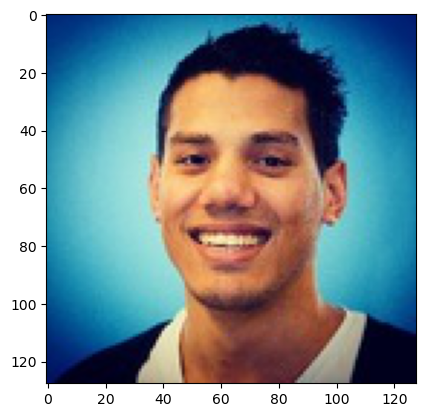

In [26]:
from PIL import Image
import os
import requests
from matplotlib.pyplot import imshow
import numpy as np

mainPath = os.getcwd()

for i, user in enumerate(some_list):
    uri = user.get_picture()
    r = requests.get(uri)
    if r.status_code == 200:
        imPath = os.path.join(mainPath, f"user_{i}.{uri.split('.')[-1]}")
        with open(imPath, "wb") as f:
            f.write(r.content)
        
        with open(imPath, "rb") as f:
            imshow(np.asarray(Image.open(f)))

<details><summary>Click here for the solution</summary>

```python
for user in some_list:
    print (user.get_picture())
```

</details>


To generate a table with information about the users, we can write a function containing all desirable parameters. For example, name, gender, city, etc. The parameters will depend on the requirements of the test to be performed. We call the Get Methods, listed at the beginning of this notebook. Then, we return pandas dataframe with the users.


In [27]:
def get_users():
    users =[]
     
    for user in RandomUser.generate_users(10):
        users.append({"Name":user.get_full_name(),"Gender":user.get_gender(),"City":user.get_city(),"State":user.get_state(),"Email":user.get_email(), "DOB":user.get_dob(),"Picture":user.get_picture()})
      
    return pd.DataFrame(users)     

In [28]:
get_users()

,Name,Gender,City,State,Email,DOB,Picture
0,Roger Peters,male,Carlisle,South Yorkshire,roger.peters@example.com,1964-06-22T07:48:02.342Z,https://randomuser.me/api/portraits/men/6.jpg
1,Romy Fontai,female,Poitiers,Seine-et-Marne,romy.fontai@example.com,1976-08-17T00:28:07.425Z,https://randomuser.me/api/portraits/women/57.jpg
2,Minervina Viana,female,Marabá,Roraima,minervina.viana@example.com,1991-10-03T18:51:46.279Z,https://randomuser.me/api/portraits/women/59.jpg
3,Deborah Allen,female,Skerries,Kilkenny,deborah.allen@example.com,1958-05-02T16:51:28.980Z,https://randomuser.me/api/portraits/women/45.jpg
4,Adem Tazegül,male,Adıyaman,Yozgat,adem.tazegul@example.com,1950-11-21T17:42:13.072Z,https://randomuser.me/api/portraits/men/1.jpg
5,پوریا نجاتی,male,ایلام,آذربایجان شرقی,pwry.njty@example.com,1969-04-01T02:38:07.431Z,https://randomuser.me/api/portraits/men/80.jpg
6,مرسانا کامروا,female,نیشابور,ایلام,mrsn.khmrw@example.com,1970-12-09T23:15:34.911Z,https://randomuser.me/api/portraits/women/42.jpg
7,Justin Riviere,male,Treytorrens (Payerne),Uri,justin.riviere@example.com,1981-03-17T09:31:32.214Z,https://randomuser.me/api/portraits/men/4.jpg
8,Cemal Roosendaal,male,Boelenslaan,Flevoland,cemal.roosendaal@example.com,1949-12-16T11:21:21.198Z,https://randomuser.me/api/portraits/men/97.jpg
9,Daniel Aalto,male,Oripää,Finland Proper,daniel.aalto@example.com,1959-02-27T11:13:01.104Z,https://randomuser.me/api/portraits/men/47.jpg


In [29]:
df1 = pd.DataFrame(get_users())  

Now we have a *pandas* dataframe that can be used for any testing purposes that the tester might have.


## Example 2: Fruitvice API

Another, more common way to use APIs, is through `requests` library. The next lab, Requests and HTTP, will contain more information about requests.

We will start by importing all required libraries.


In [30]:
import requests
import json

We will obtain the [fruitvice](https://www.fruityvice.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01) API data using `requests.get("url")` function. The data is in a json format.


In [31]:
data = requests.get("https://www.fruityvice.com/api/fruit/all")

We will retrieve results using `json.loads()` function.


In [32]:
results = json.loads(data.text)

We will convert our json data into *pandas* data frame.


In [33]:
pd.DataFrame(results)

,genus,name,id,family,order,nutritions
0,Malus,Apple,6,Rosaceae,Rosales,"{'carbohydrates': 11.4, 'protein': 0.3, 'fat':..."
1,Prunus,Apricot,35,Rosaceae,Rosales,"{'carbohydrates': 3.9, 'protein': 0.5, 'fat': ..."
2,Musa,Banana,1,Musaceae,Zingiberales,"{'carbohydrates': 22, 'protein': 1, 'fat': 0.2..."
3,Rubus,Blackberry,64,Rosaceae,Rosales,"{'carbohydrates': 9, 'protein': 1.3, 'fat': 0...."
4,Fragaria,Blueberry,33,Rosaceae,Rosales,"{'carbohydrates': 5.5, 'protein': 0, 'fat': 0...."
5,Prunus,Cherry,9,Rosaceae,None,"{'carbohydrates': 12, 'protein': 1, 'fat': 0.3..."
6,Durio,Durian,60,Malvaceae,Malvales,"{'carbohydrates': 27.1, 'protein': 1.5, 'fat':..."
7,Ficus,Fig,68,Moraceae,Rosales,"{'carbohydrates': 19, 'protein': 0.8, 'fat': 0..."
8,Ribes,Gooseberry,69,Grossulariaceae,Saxifragales,"{'carbohydrates': 10, 'protein': 0.9, 'fat': 0..."
9,Vitis,Grapes,47,Vitaceae,Vitales,"{'carbohydrates': 18.1, 'protein': 0.72, 'fat'..."


The result is in a nested json format. The 'nutrition' column contains multiple subcolumns, so the data needs to be 'flattened' or normalized.


In [34]:
df2 = pd.json_normalize(results)

In [35]:
df2

,genus,name,id,family,order,nutritions.carbohydrates,nutritions.protein,nutritions.fat,nutritions.calories,nutritions.sugar
0,Malus,Apple,6,Rosaceae,Rosales,11.40,0.30,0.40,52,10.30
1,Prunus,Apricot,35,Rosaceae,Rosales,3.90,0.50,0.10,15,3.20
2,Musa,Banana,1,Musaceae,Zingiberales,22.00,1.00,0.20,96,17.20
3,Rubus,Blackberry,64,Rosaceae,Rosales,9.00,1.30,0.40,40,4.50
4,Fragaria,Blueberry,33,Rosaceae,Rosales,5.50,0.00,0.40,29,5.40
5,Prunus,Cherry,9,Rosaceae,None,12.00,1.00,0.30,50,8.00
6,Durio,Durian,60,Malvaceae,Malvales,27.10,1.50,5.30,147,6.75
7,Ficus,Fig,68,Moraceae,Rosales,19.00,0.80,0.30,74,16.00
8,Ribes,Gooseberry,69,Grossulariaceae,Saxifragales,10.00,0.90,0.60,44,0.00
9,Vitis,Grapes,47,Vitaceae,Vitales,18.10,0.72,0.16,69,15.48


Let's see if we can extract some information from this dataframe. Perhaps, we need to know the family and genus of a cherry.


In [36]:
cherry = df2.loc[df2["name"] == 'Cherry']
(cherry.iloc[0]['family']) , (cherry.iloc[0]['genus'])

('Rosaceae', 'Prunus')

## Exercise 2

In this Exercise, find out how many calories are contained in a banana.


In [41]:
df2.loc[df2["name"] == "Banana"].iloc[0]["nutritions.calories"]

96

<details><summary>Click here for the solution</summary>

```python
cal_banana = df2.loc[df2["name"] == 'Banana']
cal_banana.iloc[0]['nutritions.calories']
```

</details>


## Exercise 3

This [page](https://github.com/public-apis/public-apis#animals) contains a list of free public APIs. Choose any API of your interest and use it to load/extract some information, as shown in the example above.

1.  Using `requests.get("url")` function, load your data.


In [50]:
url = "https://zoo-animal-api.herokuapp.com/animals/rand/10"
r = requests.get(url)
print(r.status_code)
print(r.headers["content-type"])

200
application/json; charset=utf-8


<details><summary>Click here for the solution</summary>

```python
data2 = requests.get("https://www.fishwatch.gov/api/species")
```

</details>


2.  Retrieve results using `json.loads()` function.


In [51]:
import json

data = json.loads(r.text)
data

[{'name': 'Burmese Python',
  'latin_name': 'Python molurus',
  'animal_type': 'Reptile',
  'active_time': 'Nocturnal',
  'length_min': '16',
  'length_max': '25',
  'weight_min': '140',
  'weight_max': '200',
  'lifespan': '20',
  'habitat': 'Tropical forest',
  'diet': 'Birds, mammals, and reptiles',
  'geo_range': 'Southern and Southeastern Asia',
  'image_link': 'https://upload.wikimedia.org/wikipedia/commons/8/85/Burmese_python_%286887388927%29.jpg',
  'id': 49},
 {'name': 'Aardvark',
  'latin_name': 'Orycteropus afer',
  'animal_type': 'Mammal',
  'active_time': 'Nocturnal',
  'length_min': '3.4',
  'length_max': '4.2',
  'weight_min': '88',
  'weight_max': '143',
  'lifespan': '12',
  'habitat': 'Woodland, scrubland, and grassland',
  'diet': 'Ants and termites',
  'geo_range': 'Central and Southern Africa',
  'image_link': 'https://upload.wikimedia.org/wikipedia/commons/6/67/SanWild17.jpg',
  'id': 1},
 {'name': 'Bearcat',
  'latin_name': 'Arctitis binturong',
  'animal_type': 

<details><summary>Click here for the solution</summary>

```python
results2 = json.loads(data2.text)
```

</details>


3.  Convert json data into *pandas* data frame.


In [52]:
pd.DataFrame(data)

,name,latin_name,animal_type,active_time,length_min,length_max,weight_min,weight_max,lifespan,habitat,diet,geo_range,image_link,id
0,Burmese Python,Python molurus,Reptile,Nocturnal,16,25,140,200,20,Tropical forest,"Birds, mammals, and reptiles",Southern and Southeastern Asia,https://upload.wikimedia.org/wikipedia/commons...,49
1,Aardvark,Orycteropus afer,Mammal,Nocturnal,3.4,4.2,88,143,12,"Woodland, scrubland, and grassland",Ants and termites,Central and Southern Africa,https://upload.wikimedia.org/wikipedia/commons...,1
2,Bearcat,Arctitis binturong,Mammal,Nocturnal,2,3.2,17,31,17,Tropical and subtropical forest,"Fruits, leaves, and small animals",South and Southeast Asia,https://upload.wikimedia.org/wikipedia/commons...,28
3,Victoria Crowned Pigeon,Goura victoria,Bird,Diurnal,2.2,2.4,5,5.5,12,Forest and swamp,"Fruits, seeds, insects and snails",Northern New Guinea,https://upload.wikimedia.org/wikipedia/commons...,182
4,King Cobra,Ophiophagus hannah,Reptile,Diurnal,15,18,18,20,20,"Dense rainforest, mangrove swamps, and plantat...","Lizards and snakes, including venomous species",Southeastern Asia and the Philippines,https://upload.wikimedia.org/wikipedia/commons...,98
5,Ringtail,Bassariscus astutus,Mammal,Nocturnal,2,2.5,1.5,3,11,"Forest, desert and rocky areas","Small mammals, insects, birds, reptiles and fruit",Southwestern United States and Mexico,https://upload.wikimedia.org/wikipedia/commons...,152
6,Bearded Dragon,Pogona vitteceps,Reptile,Diurnal,1.5,2,0.62,1.1,20,"Dry, rocky areas and woodland",Insects and leaves,Central and Southern Australia,https://upload.wikimedia.org/wikipedia/commons...,29
7,Fennec Fox,Vulpes zerda,Mammal,Nocturnal,9.5,16,2.3,3.3,11,Desert,"Fruit, seeds, eggs, termites, and lizards",Northern Africa and western Asia,https://upload.wikimedia.org/wikipedia/commons...,70
8,Aruba Island Rattlesnake,Crotalus unicolor,Reptile,Nocturnal,3,3.3,2,2.2,20,"Dry regions, rocky hillsides and desert","Small mammals, birds and lizards",Aruba Island,https://upload.wikimedia.org/wikipedia/commons...,18
9,Green Basilisk,Basiliscus plumifrons,Reptile,Diurnal,2,3,0.5,0.6,10,Tropical rainforest,"Seeds, fruit, leaves, insects and other small ...",Central America,https://upload.wikimedia.org/wikipedia/commons...,80


<details><summary>Click here for the solution</summary>

```python
df3 = pd.DataFrame(results2)
df3
```

</details>


# Congratulations! - You have completed the lab


## Author

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01)

Svitlana is a master’s degree Data Science and Analytics student at University of Calgary, who enjoys travelling, learning new languages and cultures and loves spreading her passion for Data Science.


Copyright © 2020 IBM Corporation. All rights reserved.
